In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from analysis import download_database
download_database()

ConnectionException: ('pr-pfcomporte.univ-lille.fr', 22)

In [11]:
from analysis import DataBase
data = DataBase('equipsy.ABETdb')
group_experiments = data.get_group_experiments()

-- ----------------------------------------------------------
-- MDB Tools - A library for reading MS Access database files
-- Copyright (C) 2000-2011 Brian Bruns and others.
-- Files in libmdb are licensed under LGPL and the utilities under
-- the GPL, see COPYING.LIB and COPYING files respectively.
-- Check out http://mdbtools.sourceforge.net
-- ----------------------------------------------------------

-- That file uses encoding UTF-8

CREATE TABLE `tbl_Schedules`
 (
	`SID`			int not null auto_increment unique, 
	`SName`			varchar (100), 
	`SEnviro`			varchar (50), 
	`SMachineName`			varchar (30), 
	`SVersion`			varchar (10), 
	`SRunDate`			datetime, 
	`SFinal`			boolean NOT NULL, 
	`ZE_GUID`			varchar (50), 
	`ZS_GUID`			varchar (50), 
	`SRecCount`			int
);

-- CREATE INDEXES ...
ALTER TABLE `tbl_Schedules` ADD PRIMARY KEY (`SID`);

CREATE TABLE `tbl_Schedule_Notes`
 (
	`SID`			int, 
	`NName`			varchar (100), 
	`NValue`			text
);

-- CREATE INDEXES ...

CREATE TABLE `tbl_Data`
 (


No MSysRelationships


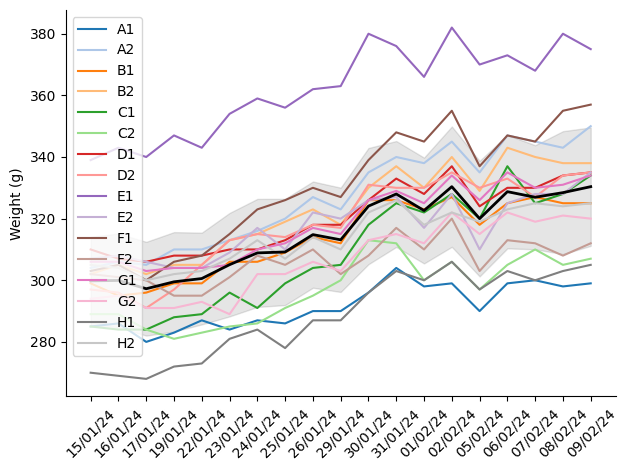

In [12]:
from plotting import *
display_weights(group_experiments, output='weights.png')

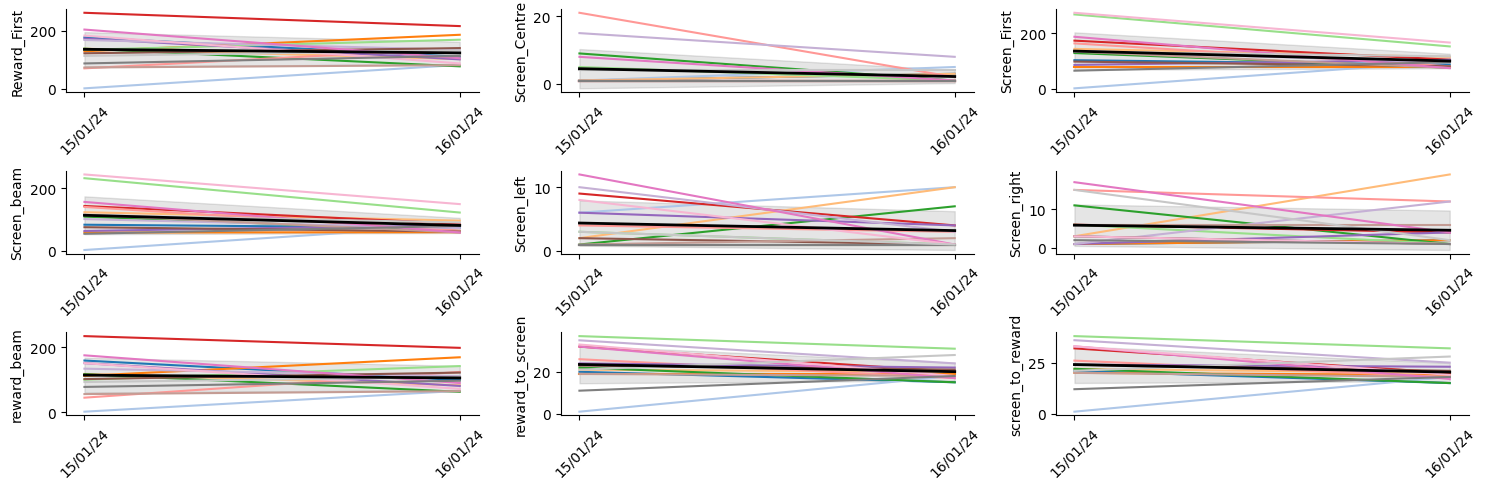

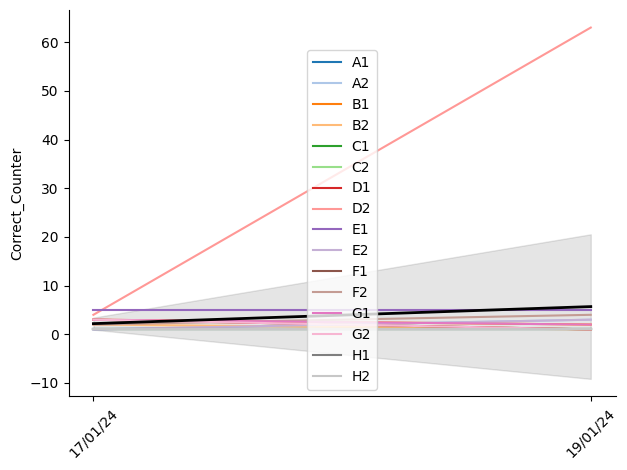

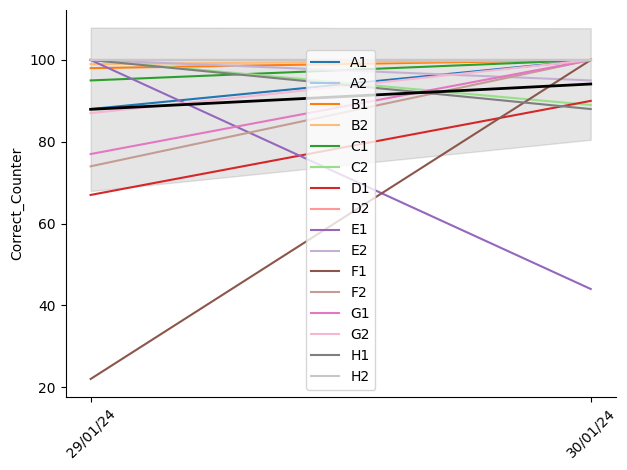

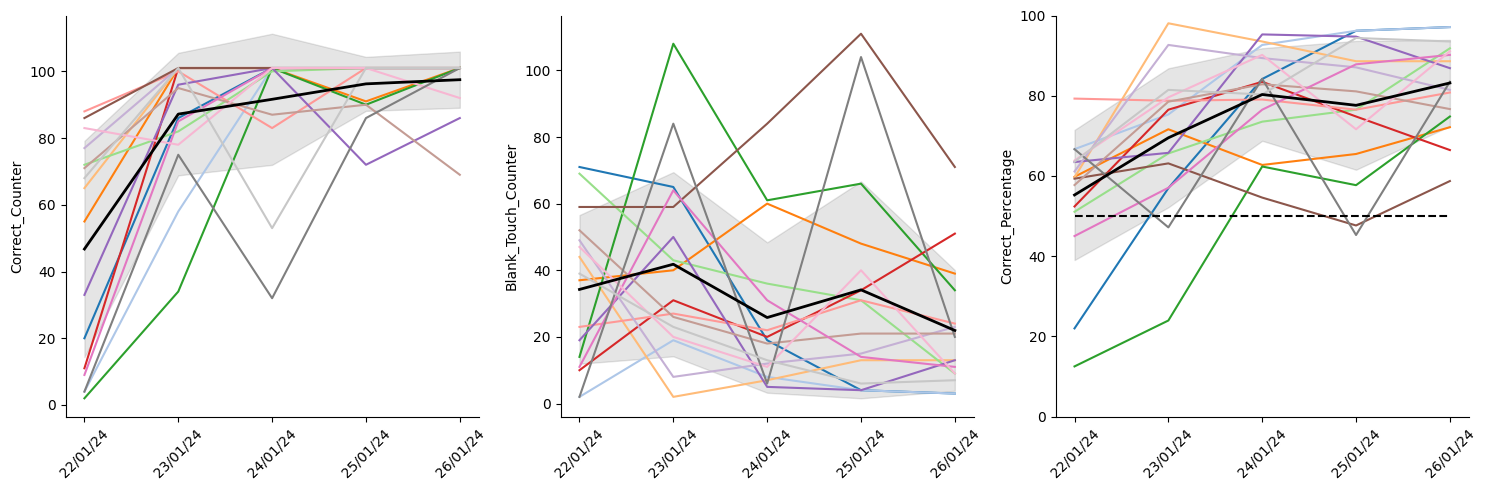

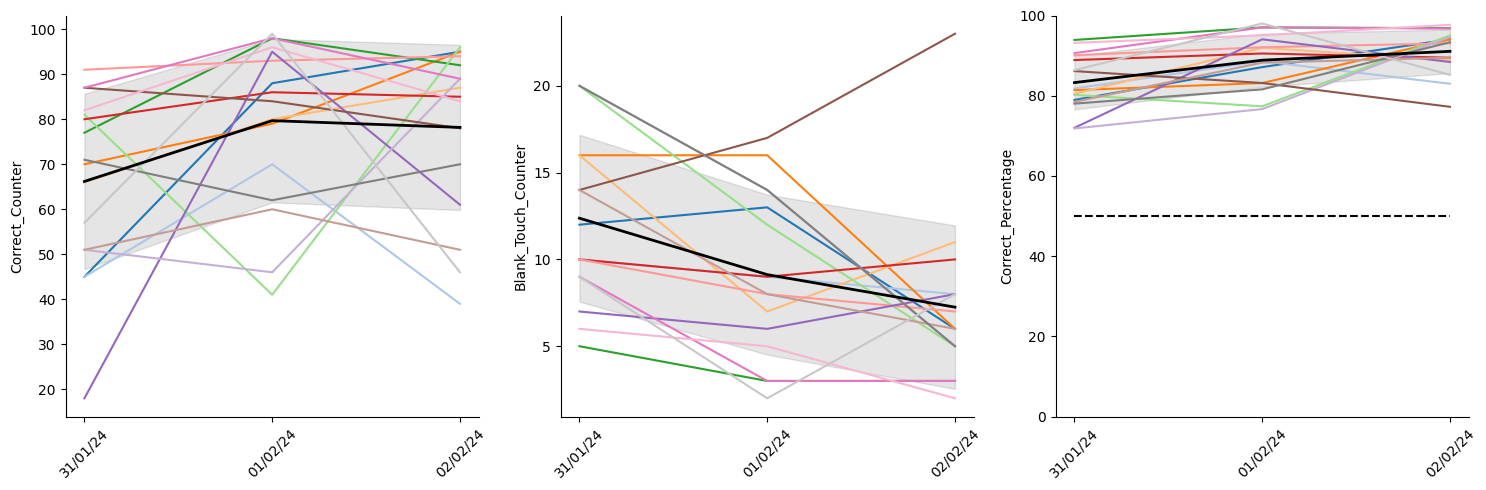

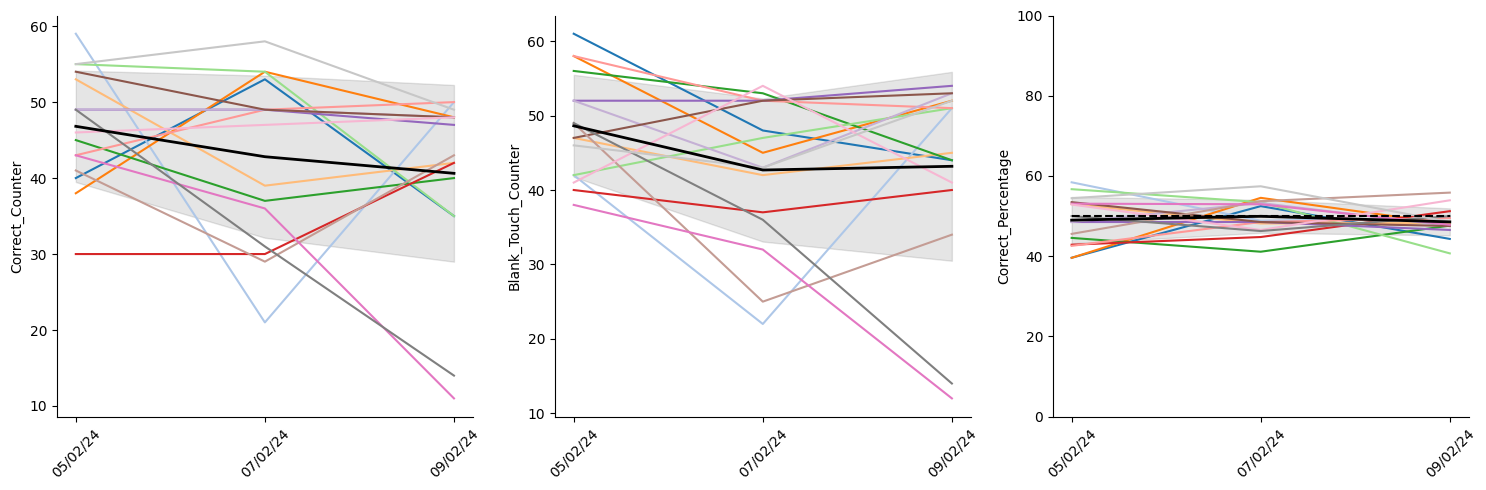

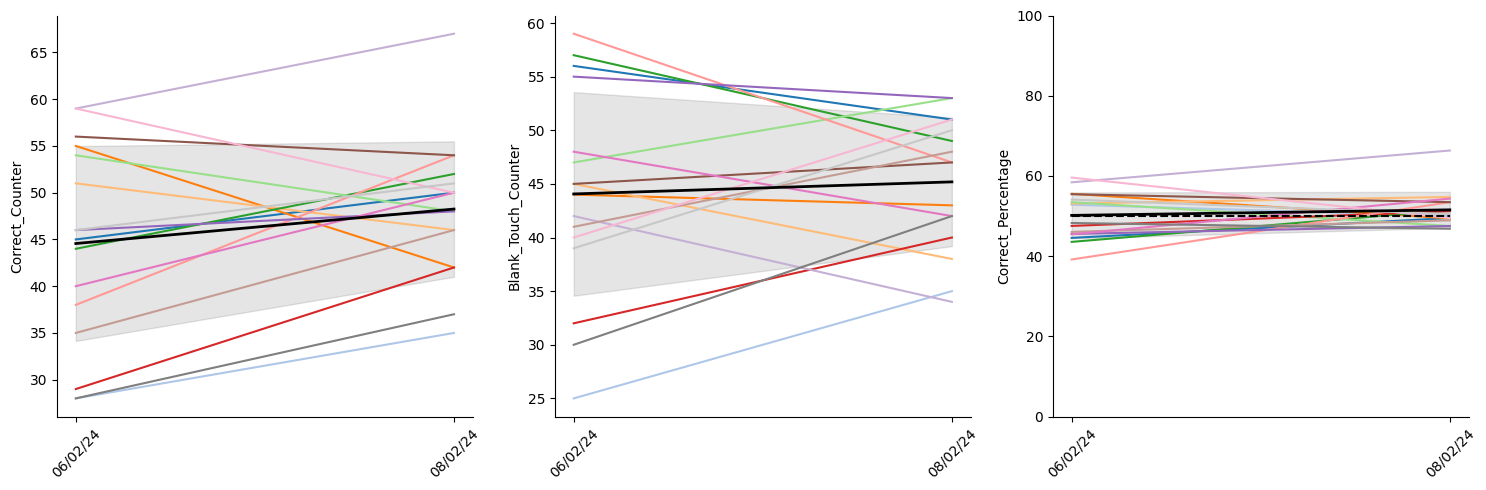

In [13]:
from plotting import *
for type in group_experiments.all_types:
    a = group_experiments.get_experiments_per_types(type)
    display_variables(a, output=f'{type}.png')

R-squared: 0.051285


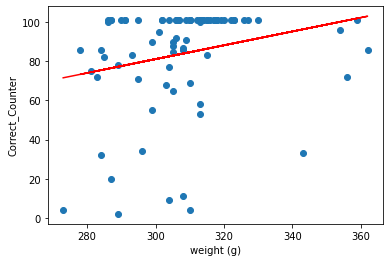

In [27]:
# Get initial weights

for type in ['Must Touch']:
    a = group_experiments.get_experiments_per_types(type)
    all_weights = []
    all_perfs = []
    for e in a.experiments:
        all_weights += [e.weight]
        all_perfs += [e.stats['Correct_Counter']]
all_weights = np.array(all_weights)
all_perfs = np.array(all_perfs)
#plt.plot(all_weights, all_perfs, '.')

plt.xlabel('weight (g)')
plt.ylabel('Correct_Counter')
from scipy import stats
res = stats.linregress(all_weights, all_perfs)
plt.plot(all_weights, all_perfs, 'o', label='original data')
plt.plot(all_weights, res.intercept + res.slope*all_weights, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")

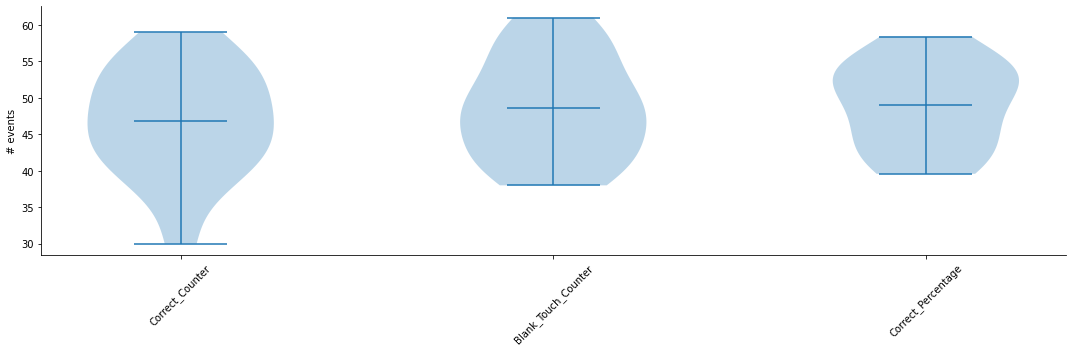

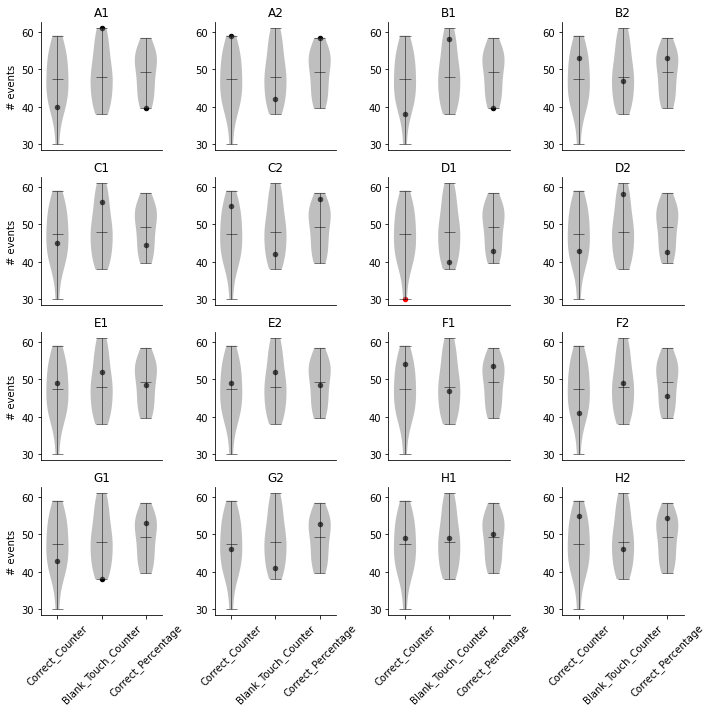

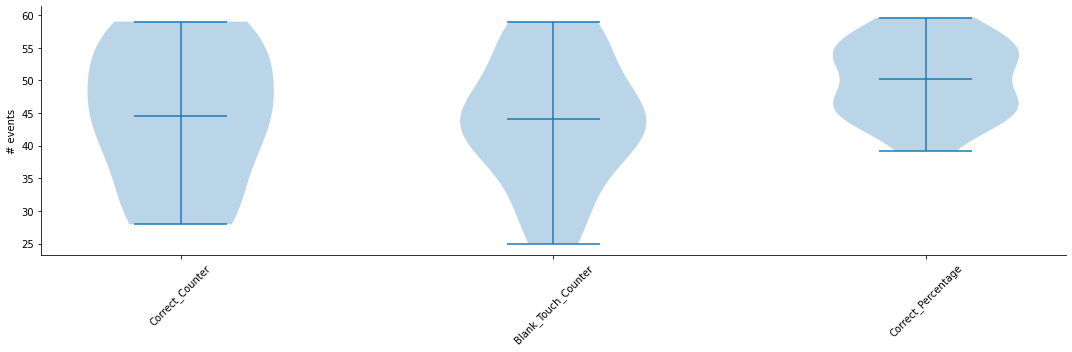

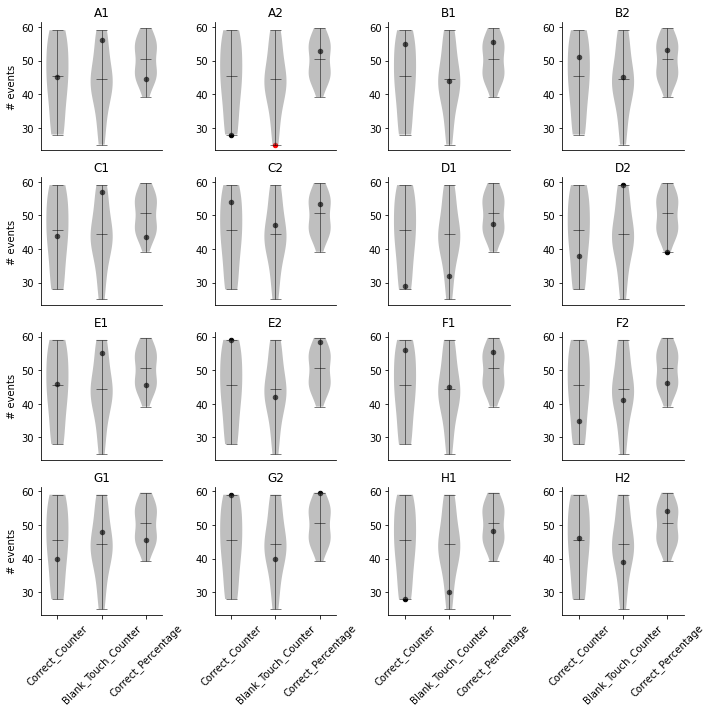

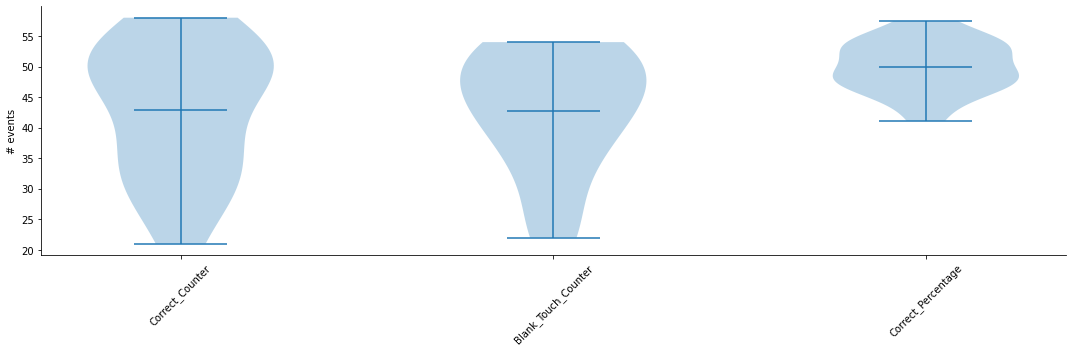

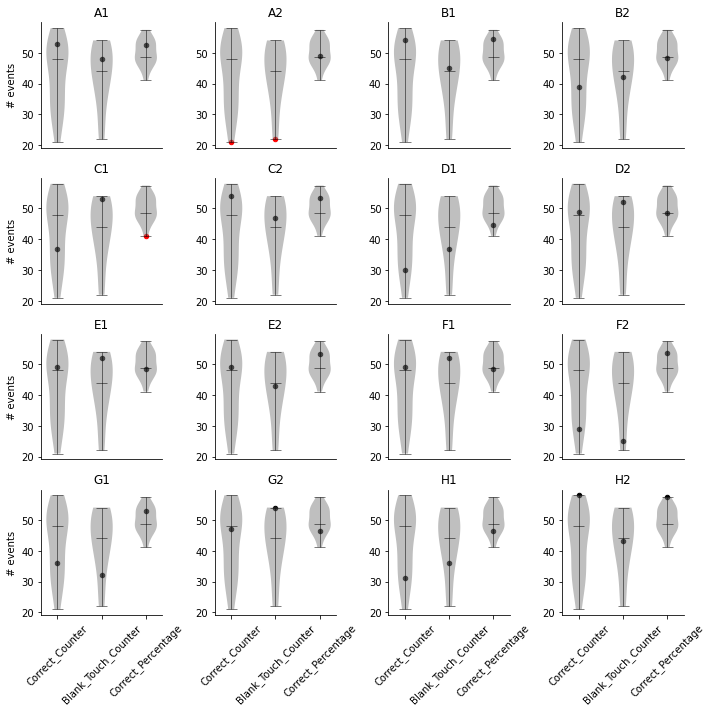

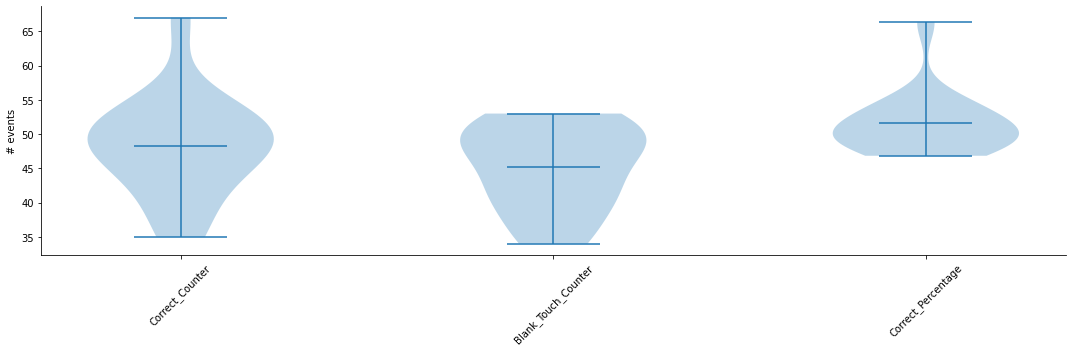

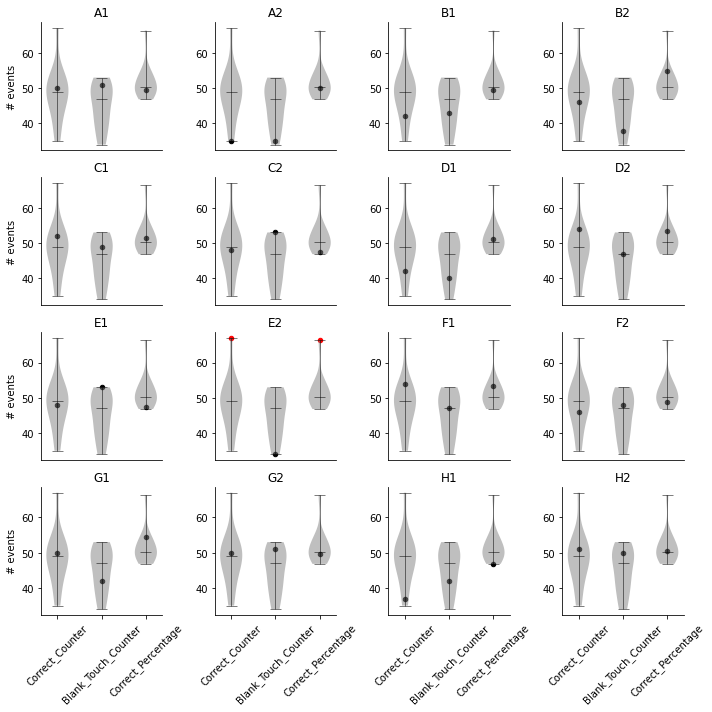

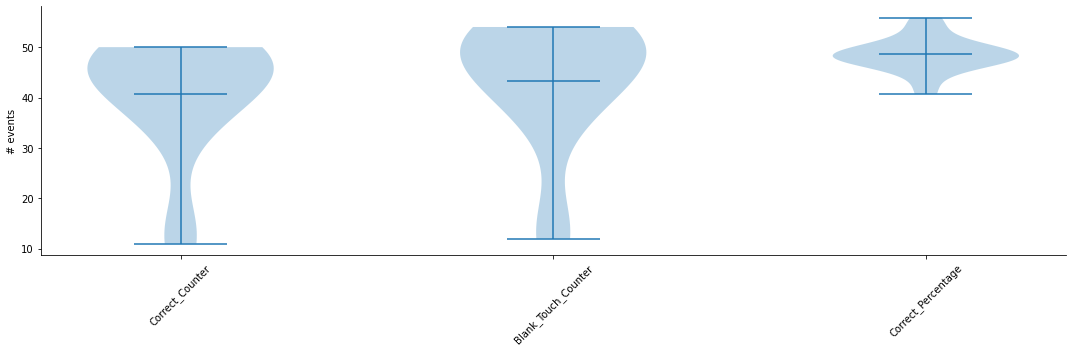

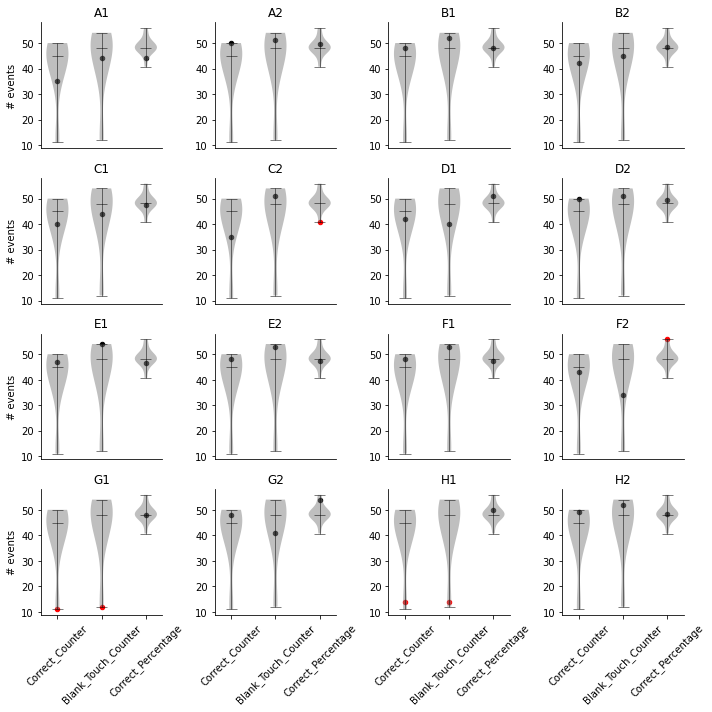

In [31]:
for date in ['05/02/24', '06/02/24', '07/02/24', '08/02/24', '09/02/24']:
    a = group_experiments.get_experiments_per_dates(date)
    mydate = date.replace('/', '')
    display_stats_group_experiments(a, output=f'stats_{mydate}.png')
    display_group_experiments(a, output=f'individuals_{mydate}.png')

In [22]:
# Get initial weights
all_reaction_times = []
all_perfs = []
all_corrcoeffs = []
all_types = []
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    for e in a.experiments:
        tmp = e.get_reaction_times()
        all_corrcoeffs += [np.corrcoef(tmp, e.get_responses())[0, 1]]
        all_reaction_times += [tmp.mean()]
        all_perfs += [e.stats['Correct_Percentage']]
        if e.type == 'Theta 1':
            all_types += [1]
        else:
            all_types += [2]

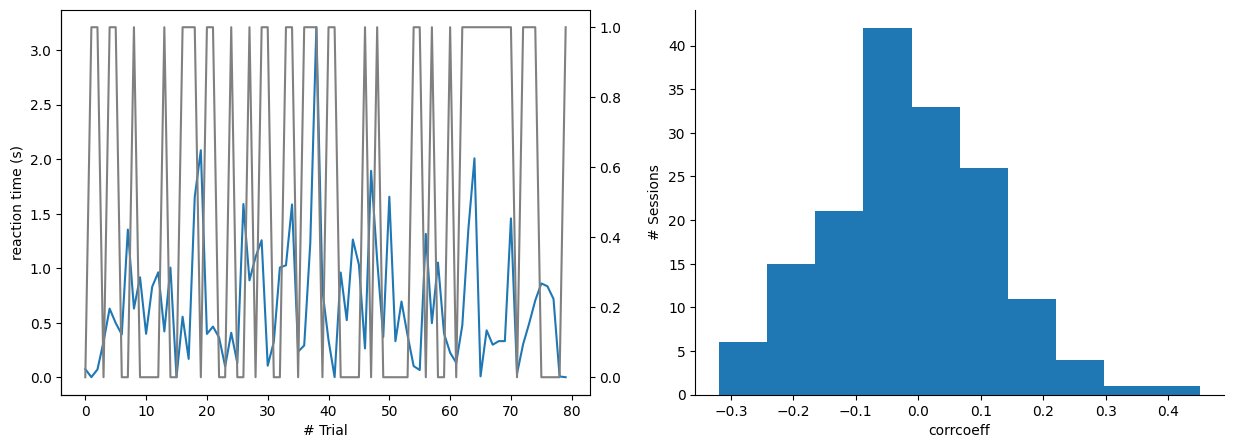

In [50]:
all_reaction_times = np.array(all_reaction_times)
all_perfs = np.array(all_perfs)
all_types = np.array(all_types)

fix, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

tmp = np.array(e.get_reaction_times())

axes[0].set_ylabel('reaction time (s)')
#axes[0].set_ylabel('Performances')
#axes[0].plot(tmp, e.get_responses(), '.')

axes[0].set_xlabel('# Trial')
# axes[1].set_ylabel('Performances')
from scipy import stats
res = stats.linregress(tmp, e.get_responses())
#axes[0].plot(tmp, e.get_responses(), 'o', label='original data')
#axes[0].plot(tmp, res.intercept + res.slope*tmp, 'r', label='fitted line')
axes[0].plot(tmp)
ax2 = axes[0].twinx() 
ax2.plot(e.get_responses(), c='0.5')
# print(f"R-squared: {res.rvalue**2:.6f}")
axes[1].hist(all_corrcoeffs, 10)
axes[1].set_xlabel('corrcoeff')
axes[1].set_ylabel('# Sessions')
from plotting import _simpleaxis
_simpleaxis(axes[1])
_simpleaxis(axes[0])
plt.savefig('corrcoeff_vs_time.png')

R-squared: 0.023923


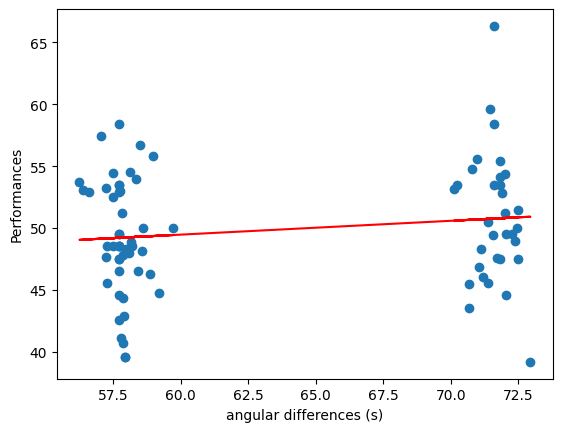

In [38]:
# Get initial weights
all_angular_differences = []
all_perfs = []
all_corrcoeffs_2 = []
for type in ['Theta 1', 'Theta 2']:
    a = group_experiments.get_experiments_per_types(type)
    for e in a.experiments:
        tmp = e.get_angular_differences()
        tmp_2 = e.get_responses()
        if len(tmp) == len(tmp_2) + 1:
            tmp = tmp[:-1]
        all_corrcoeffs += [np.corrcoef(tmp, tmp_2)[0, 1]]
        all_angular_differences += [tmp.mean()]
        all_perfs += [e.stats['Correct_Percentage']]
all_angular_differences = np.array(all_angular_differences)
all_perfs = np.array(all_perfs)

plt.xlabel('angular differences (s)')
plt.ylabel('Performances')
from scipy import stats
res = stats.linregress(all_angular_differences, all_perfs)
plt.plot(all_angular_differences, all_perfs, 'o', label='original data')
plt.plot(all_angular_differences, res.intercept + res.slope*all_angular_differences, 'r', label='fitted line')
print(f"R-squared: {res.rvalue**2:.6f}")

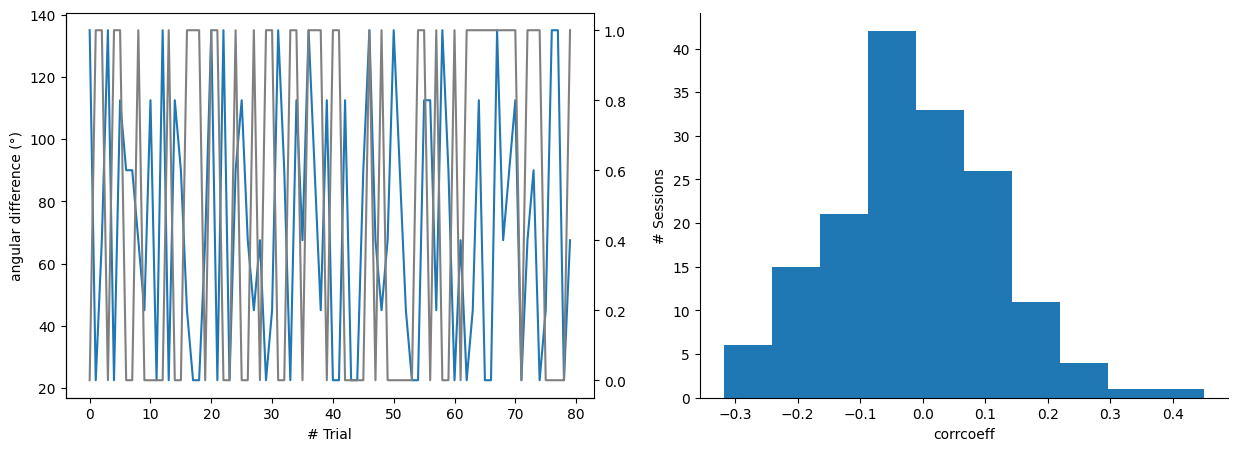

In [55]:
all_reaction_times = np.array(all_reaction_times)
all_perfs = np.array(all_perfs)
all_types = np.array(all_types)

fix, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

tmp = np.array(e.get_angular_differences())

axes[0].set_ylabel('angular difference (°)')
axes[0].set_xlabel('# Trial')
#axes[0].plot(tmp, e.get_responses(), '.')

# axes[1].set_xlabel('reaction time (s)')
# axes[1].set_ylabel('Performances')
from scipy import stats
res = stats.linregress(tmp, e.get_responses())
axes[0].plot(tmp)
ax2 = axes[0].twinx() 
ax2.plot(e.get_responses(), c='0.5')
#axes[0].plot(tmp, res.intercept + res.slope*tmp, 'r', label='fitted line')
# print(f"R-squared: {res.rvalue**2:.6f}")
axes[1].hist(all_corrcoeffs, 10)
axes[1].set_xlabel('corrcoeff')
axes[1].set_ylabel('# Sessions')
from plotting import _simpleaxis
_simpleaxis(axes[1])
_simpleaxis(axes[0])
plt.savefig('angle_vs_time.png')